In [2]:
import pandas as pd 
import numpy as np 
from typing import List, Tuple, Dict 
import matplotlib.pyplot as plt 


In [3]:
# Build the dataset: 
# In practice you can import your files in any format

In [4]:
data: Dict[str, List] = {
    'id': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],
    "surv1": [6,6,6,7,10,13,16,22,23,6,9,10,11,17,19,20,25,32,32,34,35],
    "delta1": [1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0],
    "surv2": [1,2,3,4,5,8,8,11,12,15,17,12,23,1,2,4,5,8,8,11,12],
    "delta2": [1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0]}

In [5]:
# Run here to see the dataset
df = pd.DataFrame(data = data)
print("\n----------------------------")
display(df) # Display the dataset: 
#In case of large dataset [print(df.shape), df.head(10)] can be used



----------------------------


,id,surv1,delta1,surv2,delta2
0,1,6,1,1,1
1,2,6,1,2,1
2,3,6,1,3,1
3,4,7,1,4,1
4,5,10,1,5,1
5,6,13,1,8,1
6,7,16,1,8,1
7,8,22,1,11,1
8,9,23,1,12,1
9,10,6,0,15,1


In [6]:
def compute_summary_stats(df: pd.DataFrame = df) -> Tuple[float, float, float,
                                                    float, float, float, float]:

    '''
    @Martin:
    ---------------
    
    This method compute the summary descriptive stats for the given 
    survival data:

    -----------------
    Arguments:
    df: pd.DataFrame => Pandas dataframe. Can be any data format ie csv etc
    -----------------
    Returns
    -------

    -avg_1: average survival time for group 1 = sum(surv_1)/N
    -avg_2: average survival time for group 2 = sum(surv_2)/N
    avg_h1: average hazard for group 1 = # events / sum(surv_1)
    avg_h2: average hazard for group 2 = # events / sum(surv_2)
    hr: hazard ratio = avg_h1 / avg_h2

    '''
    
    # compute average survival time for both groups

    avg_1, avg_2 = df.surv1.mean(), df.surv2.mean()

    # compute average hazard for both groups

    avg_h1 = df[df["delta1"]==1]["surv1"].count()/df["surv1"].sum()
    avg_h2 = df[df["delta2"]==1]["surv2"].count()/df["surv2"].sum()
    
    # compute the hazards ratio:

    hr = float(avg_h1 / avg_h2)

    # compute the percentage of censored subjects:

    fs1 =  df[df["delta1"] == 0]['surv1'].count() /len(df)*100
    fs2 =  df[df["delta2"] == 0]['surv2'].count() /len(df)*100

    return (avg_1, avg_2, avg_h1, avg_h2, hr, fs1, fs2)



In [7]:
# Run here to compute summary statistics

res = compute_summary_stats()

avg_1, avg_2, avg_h1, avg_h2, hr, fs1, fs2 = res # unpacking the results

# print out the results

print("\n----------------------------")
print(f"\n>>>> The average survival for group 1: {avg_1:.3f}\
      \n>>>> The average survival for group 2: {avg_2:.3f}")
print("\n----------------------------")

print(f" >>>> Average hazard for group1: {avg_h1:.4f},\
      \n >>>> Average hazard for group2: {avg_h2:.4f}")
print("\n----------------------------")
print(f">>>> The hazard ratio: {avg_h1 / avg_h2:.4f}\n")


----------------------------

>>>> The average survival for group 1: 17.095      
>>>> The average survival for group 2: 8.190

----------------------------
 >>>> Average hazard for group1: 0.0251,      
 >>>> Average hazard for group2: 0.0756

----------------------------
>>>> The hazard ratio: 0.3317



## Q1. Intepreate the above findings

# Answer here ...

In [20]:
def surv_distributions_plot(df: pd.DataFrame = df) -> None:

    '''
    @ Martin:
    This method plot the histogram of raw survival times for both groups

    argument:
    -----------
    df: pd.DataFrame, can also be dataset in any other format like csv
    '''

    plt.figure(figsize = (10,12))
    df['surv1'].hist(label = "group1 survival time", color = "gray")
    df['surv2'].hist(label = "group 2 survival time", color = "green")
    plt.legend(loc = "best")
    plt.xlabel("survival time in 'years'")
    plt.ylabel("counts")
    plt.title("Raw survival times distribution")
    plt.grid(False)
    plt.show()

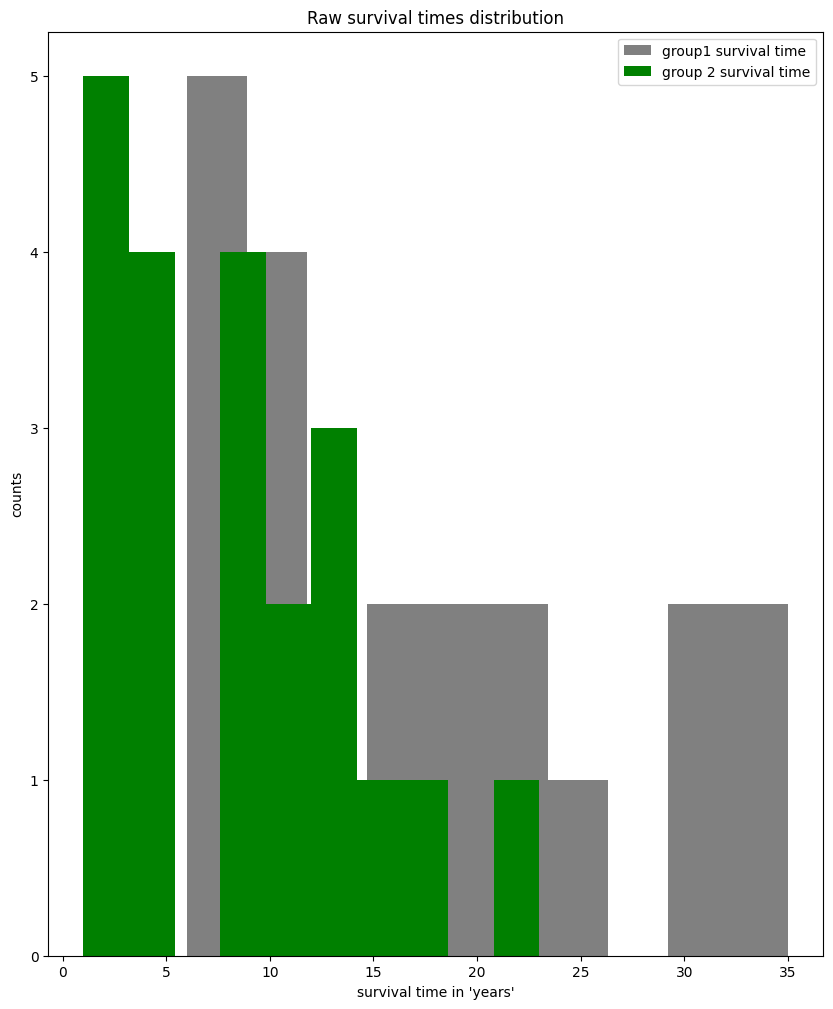

In [21]:
# Run here to plot survival time distribution:
surv_distributions_plot()

## Q2. Comment on the above plot
# Answer here ...

In [24]:
def events_distribution_plot(df: pd.DataFrame = df) -> None:

    '''
     @ Martin:
    This method plot the histogram of raw event times for both groups

    argument:
    -----------
    df: pd.DataFrame, can also be dataset in any other format like csv
    '''
    
    plt.figure(figsize = (10,12))
    df[df["delta1"] == 1]['surv1'].hist(label = "group 1 events distribution", color = "violet")
    df[df["delta2"] == 1]['surv2'].hist(label = "group 2 events distribution", color = "orange")
    plt.legend(loc = "best")
    plt.xlabel("Event times")
    plt.ylabel("counts")
    plt.title("Distribution of event times for the two groups")
    plt.grid(False)
    plt.show()
    


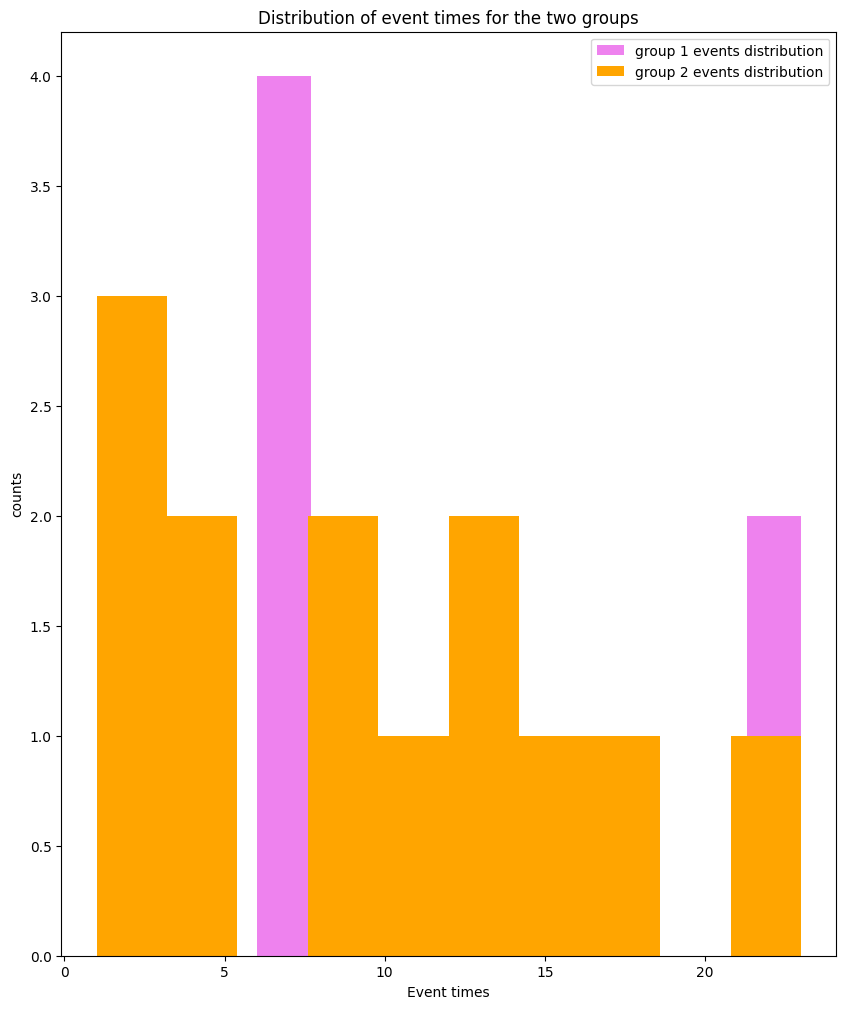

In [25]:
# Run here to plot the distribution events
events_distribution_plot()

## Q3. Comment on the above plot
# Answer here ....

In [30]:
def censore_distribution_plot(df: pd.DataFrame = df) -> None:

    '''
     @ Martin:
    This method plot the histogram of censored subjects in both groups

    argument:
    -----------
    df: pd.DataFrame, can also be dataset in any other format like csv
    '''
    plt.figure(figsize = (10,12))
    df[df["delta1"]==0]['surv1'].hist(label = "censored group1", color = "gray")
    df[df["delta2"]==0]['surv2'].hist(label = "censored group2", color = "green")
    plt.legend(loc = "best")
    plt.xlabel("Censoreship times")
    plt.ylabel("counts")
    plt.title("Distribution of censored subjects in both groups")
    plt.grid(False)  
    plt.show()

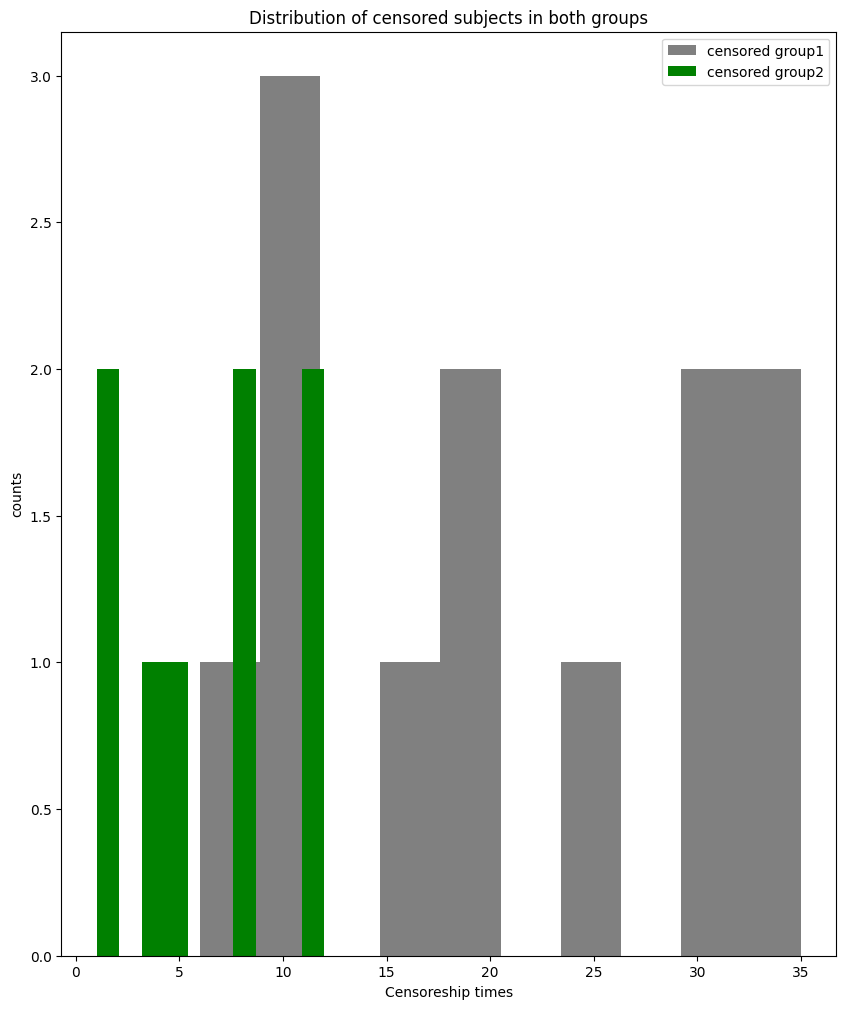

In [31]:
# Run here to plot censoreship distribution
censore_distribution_plot()

## Q4. Comment on the above plot
# Answer here....

In [32]:
def naive_estimator(t: float, df: pd.DataFrame) -> List[float]:
    """
    @Martin
    -----------
    Return naive estimate for S(t), the probability
    of surviving past time t. Given by number
    of cases who survived past time t divided by the
    number of cases who weren't censored before time t.
    
    Arguments:
        t (float): Specified time stamp
        df: pd.DataFrame: Survival data.

    Returns:
    ----------
        S_t (float): List of probabilities: estimator for survival function evaluated at t.
    """   
    X = sum(df['surv1'] > t)
    M = sum( (df['surv1'] > t) | (df['delta1'] == 1) )
    S_t = X / M
    
    return S_t  


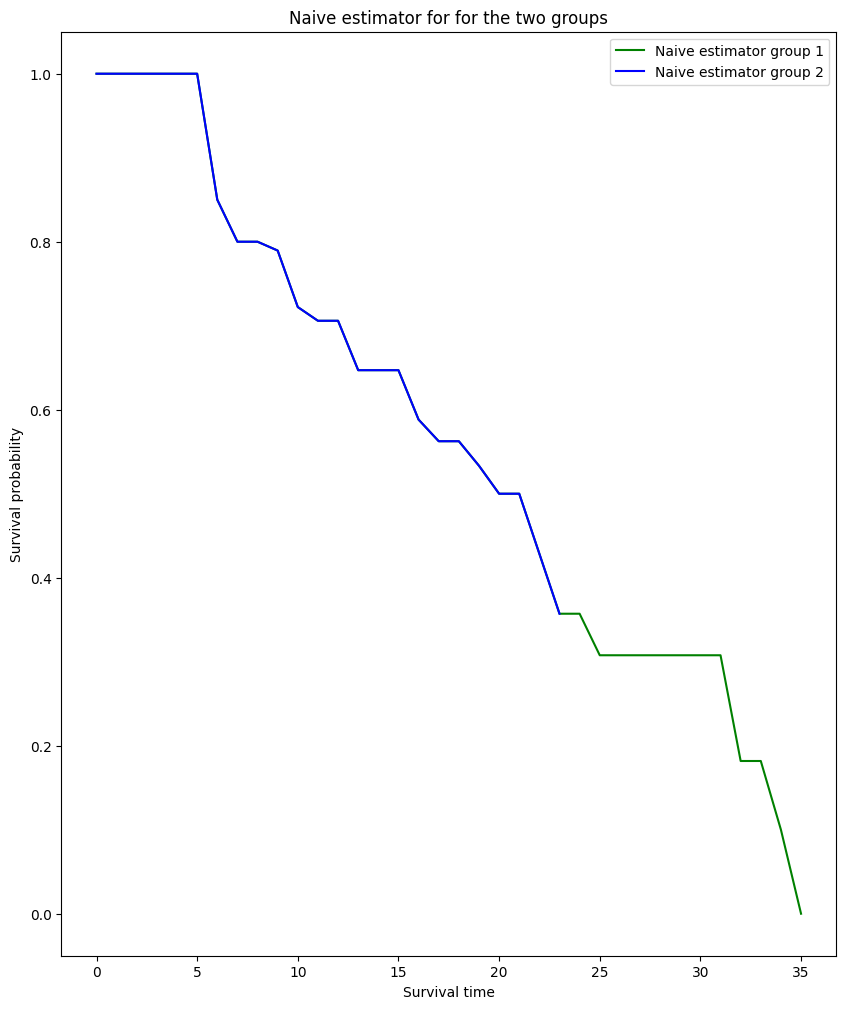

In [34]:
# run here to plot the naive estomators
max_time1 = df.surv1.max() # for group 1
max_time2 = df.surv2.max() # for group 2

x1 = range(0, max_time1 + 1)
y1 = np.zeros(len(x1)) 

x2 = range(0, max_time2 + 1)
y2 = np.zeros(len(x2))

for i, t in enumerate(x1):
    y1[i] = naive_estimator(t, df)

for i, t in enumerate(x2):
    y2[i] = naive_estimator(t, df)

plt.figure(figsize = (10, 12))    
plt.plot(x1, y1, label="Naive estimator group 1", color = "green")
plt.plot(x2, y2, label = "Naive estimator group 2", color = "blue")
plt.legend(loc = "best")
plt.xlabel("Survival time")
plt.ylabel("Survival probability")
plt.title("Naive estimator for for the two groups")
plt.show()

## Q5. Comment on the above plot.
# Ans here......

In [35]:
def KM(df: pd.DataFrame, group: str = "g1") -> Tuple[List[float], List[float]]:

    """
    @ Martin
    -------------

    This method compute KM estimate evaluated at every distinct
    time (event or censored) recorded in the dataset.

    We use the product limit theory/formular: S_hat = Product(1 - mi/ri)

    where mi: number of events at time t_i, and ri is the risk set at that time

    Arguments:
    -----------
    df: pd.DataFrame ==> Survival data
    group: str ==> group "g1" for group 1, "g2" for group 2

    Return
    ----------
    S: List of survival probabilities ==> KM estimates
    events: List of survival times

    """
    event_times = [0] # In the begining we initialize survival function to 1 (at time 0, p = 1) 
    p = 1.0
    S = [p]
    
    # get collection of unique observed event times
    obst1 = df.surv1.unique()
    obst2 = df.surv2.unique()
  
    # sort event times in ascending order of magnitude 
    obst1 = sorted(obst1)
    obst2 = sorted(obst2)
    
    if group == "g1":
        # iterate through event times
        for t in obst1:      
    
            # compute n_t, number of people who survive at least to time t
            n_t = len(df[df.surv1 >= t])
    
            # compute d_t, number of people who die at time t
            d_t = len(df[(df.surv1 == t) & (df.delta1 == 1)])
    
            # update p
            p = p*(1 - float(d_t)/n_t)
    
            # update S and event_times 
            event_times.append(t)
            S.append(p)
    else:
        for t in obst2:      
    
            # compute n_t, number of people who survive at least to time t
            n_t = len(df[df.surv2 >= t])
    
            # compute d_t, number of people who die at time t
            d_t = len(df[(df.surv2 == t) & (df.delta2 == 1)])
    
            # update p
            p = p*(1 - float(d_t)/n_t)
    
            # update S and event_times 
            event_times.append(t)
            S.append(p)

  
    return (event_times, S)





------------------------
>>>> KM surv probs group 1: [1.0, 0.8571428571428572, 0.8067226890756303, 0.8067226890756303, 0.7529411764705882, 0.7529411764705882, 0.6901960784313725, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.5378151260504203, 0.44817927170868355, 0.44817927170868355, 0.44817927170868355, 0.44817927170868355, 0.44817927170868355]
>>>> KM surv probs group 2: [1.0, 0.9523809523809523, 0.9022556390977444, 0.8491817779743477, 0.796107916850951, 0.7392430656473116, 0.6160358880394263, 0.5390314020344981, 0.35935426802299875, 0.23956951201533253, 0.11978475600766626, 0.0]

------------------------


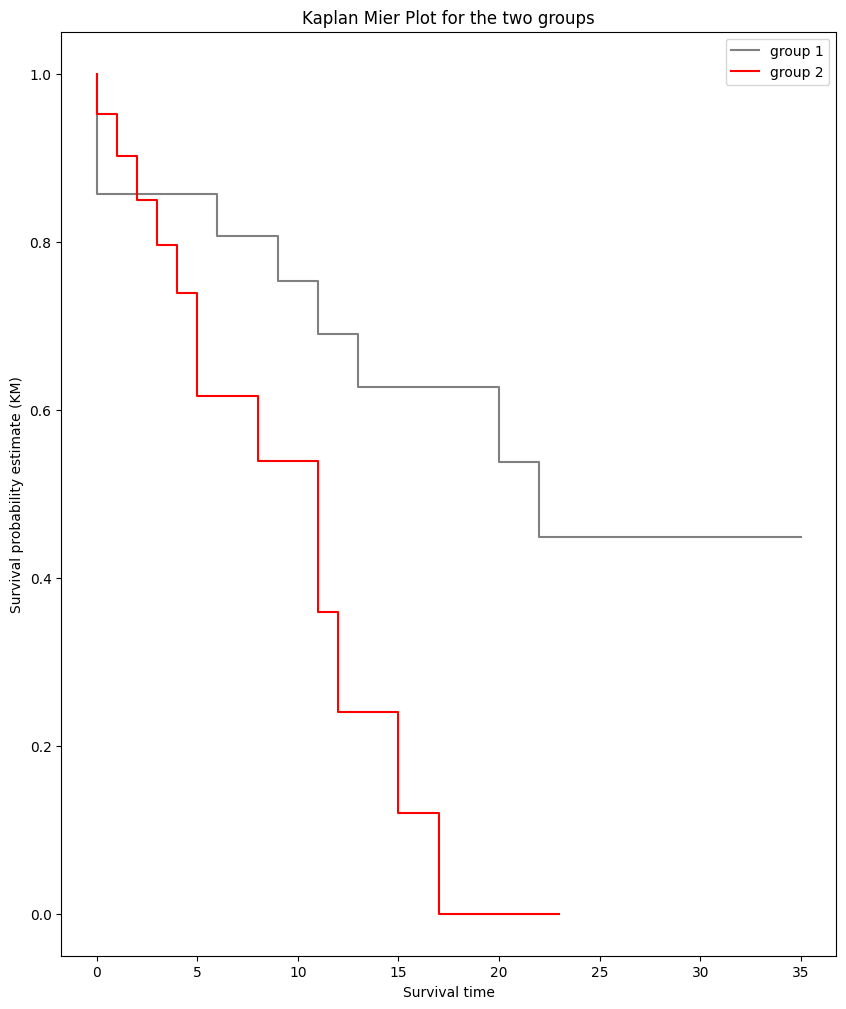

In [37]:
# Run here to plot KM estimators for the two groups

res1 = KM(df, group = "g1")
x1, y1 = res1
res2 = KM(df, group = "g2")
x2, y2 = res2
print(f"\n------------------------")
print(f">>>> KM surv probs group 1: {y1}\n>>>> KM surv probs group 2: {y2}")
print(f"\n------------------------")

plt.figure(figsize = (10, 12))
plt.step(x1, y1, label = "group 1", color = "gray")
plt.step(x2, y2, label = "group 2", color = "red")
plt.xlabel("Survival time")
plt.ylabel("Survival probability estimate (KM)")
plt.legend()
plt.title("Kaplan Mier Plot for the two groups")
plt.show()

## Q6. Comment on the above plot:

# Answer here:.....